In [ ]:
import pandas as pd
l1=pd.read_csv('/content/drive/MyDrive/archive (11)/Fake.csv')
l2=pd.read_csv('/content/drive/MyDrive/archive (11)/True.csv')

In [ ]:
l1.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
l2.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
l1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
l2.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
l1.shape

(23481, 4)

In [ ]:
l2.shape

(21417, 4)

In [ ]:
l1['is_news_fake']=1
l2['is_news_fake']=0

In [ ]:
news=pd.concat([l1,l2])

In [ ]:
news.head(5)

,title,text,subject,date,is_news_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
news.tail(5)

,title,text,subject,date,is_news_fake
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [ ]:
news.sample(5)

,title,text,subject,date,is_news_fake
3158,Democratic Party says special counsel needs fu...,WASHINGTON (Reuters) - The special counsel app...,politicsNews,"June 16, 2017",0
14621,TEACHER’S UNION PROTEST Gets Ugly As Protester...,"In case you don t live in the Midwest, you mig...",politics,"Jan 20, 2016",1
15717,Cambodian PM tells opposition to defect or fac...,PNHOM PENH (Reuters) - Cambodian Prime Ministe...,worldnews,"November 4, 2017",0
2287,"After sanctions, Tillerson may find Russia tal...",WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"August 5, 2017",0
17511,Russia questions future of Syria chemical weap...,UNITED NATIONS (Reuters) - Russia on Friday qu...,worldnews,"October 13, 2017",0


In [ ]:
news.shape

(44898, 5)

In [ ]:
news.isnull().sum()

title           0
text            0
subject         0
date            0
is_news_fake    0
dtype: int64

<Axes: xlabel='is_news_fake', ylabel='count'>

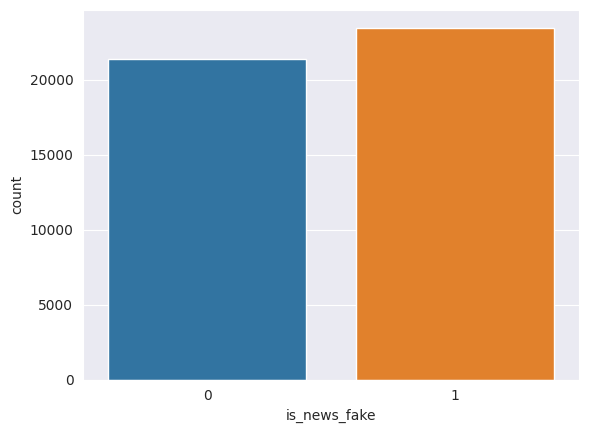

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
news['is_news_fake'] = news['is_news_fake'].astype('category')
news = news.dropna(subset=['is_news_fake'])
news = news.reset_index(drop=True)
sns.countplot(x='is_news_fake', data=news)

In [ ]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
news['text']=news['text'] + ' ' + news['title']
del news['date']
del news['subject']
del news['title']
news.head()

,text,is_news_fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re
s_w=set(stopwords.words('english'))
p=list(string.punctuation)
s_w.update(p)
def rock(text):
    nip=BeautifulSoup(text,"html.parser")
    return nip.get_text()
def film(text):
    return re.sub('\[[^]]*\]','',text)
def run(text):
    return re.sub(r'http\S+','',text)
def rum(text):
    final_text=[]
    for i in text.split():
        if i.strip().lower() not in s_w:
            final_text.append(i.strip())
    return " ".join(final_text)
def clean_text_data(text):
    text=rock(text)
    text=film(text)
    text=rum(text)
    text=run(text)
    return text
news['text']=news['text'].apply(clean_text_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-58-9d8817c7e960>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")


In [ ]:
news['text']

0        Donald Trump wish Americans Happy New Year lea...
1        House Intelligence Committee Chairman Devin Nu...
2        Friday, revealed former Milwaukee Sheriff Davi...
3        Christmas day, Donald Trump announced would ba...
4        Pope Francis used annual Christmas Day message...
                               ...                        
44893    BRUSSELS (Reuters) NATO allies Tuesday welcome...
44894    LONDON (Reuters) LexisNexis, provider legal, r...
44895    MINSK (Reuters) shadow disused Soviet-era fact...
44896    MOSCOW (Reuters) Vatican Secretary State Cardi...
44897    JAKARTA (Reuters) Indonesia buy 11 Sukhoi figh...
Name: text, Length: 44898, dtype: object

In [ ]:
import re,string,unicodedata
from keras.preprocessing import text,sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(news.text,news.is_news_fake,random_state=0)

In [ ]:
tokenizer=text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tokenizer_train=tokenizer.texts_to_sequences(X_train)
X_train=sequence.pad_sequences(tokenizer_train,maxlen=300)
tokenizer_test=tokenizer.texts_to_sequences(X_test)
X_test=sequence.pad_sequences(tokenizer_test,maxlen=300)

In [ ]:
glove_file='/content/drive/MyDrive/glove.6B.100d.txt'

In [ ]:
import numpy as np
def get_coefs(word, *arr):
    return word, np.asarray(arr,dtype='float32')
embeddings_index=dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(glove_file,encoding="utf8"))

In [ ]:
all_embs=np.stack(embeddings_index.values())
emb_mean,emb_std=all_embs.mean(),all_embs.std()
emb_size=all_embs.shape[1]
word_index=tokenizer.word_index
nb_words=min(10000,len(word_index))
embedding_matrix = np.random.normal(emb_mean,emb_std,(nb_words,emb_size))
for word,i in word_index.items():
    if i>=10000: continue
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i]=embedding_vector

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
batch_size=256
epochs=5
emb_size=100
leaning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=10,factor=0.5,min_lr=0.00001)

In [ ]:
model=Sequential()
model.add(Embedding(10000,output_dim=emb_size,weights=[embedding_matrix],input_length=300,trainable=False))
model.add(LSTM(units=256,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=128,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=64,recurrent_dropout=0.1,dropout=0.1))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 300, 256)          365568    
                                                                 
 lstm_4 (LSTM)               (None, 300, 128)          197120    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1614209 (6.16 MB)
Trainable params: 6142

In [ ]:
history=model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test,y_test),epochs=epochs,callbacks=[leaning_rate_reduction])

Epoch 1/5
132/132 [==============================] - 2247s 17s/step - loss: 0.2215 - accuracy: 0.9087 - val_loss: 0.1479 - val_accuracy: 0.9485 - lr: 0.0010
Epoch 2/5
132/132 [==============================] - 2236s 17s/step - loss: 0.1111 - accuracy: 0.9575 - val_loss: 0.0628 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 3/5
132/132 [==============================] - 2239s 17s/step - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.0430 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 4/5
132/132 [==============================] - 2242s 17s/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 0.0346 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 5/5
132/132 [==============================] - 2244s 17s/step - loss: 0.0452 - accuracy: 0.9838 - val_loss: 0.0320 - val_accuracy: 0.9890 - lr: 0.0010


In [ ]:
pred = model.predict(X_test)
pred[1:5]

351/351 [==============================] - 282s 799ms/step


array([[4.1706345e-04],
       [5.5908517e-04],
       [4.2995397e-04],
       [9.9962848e-01]], dtype=float32)

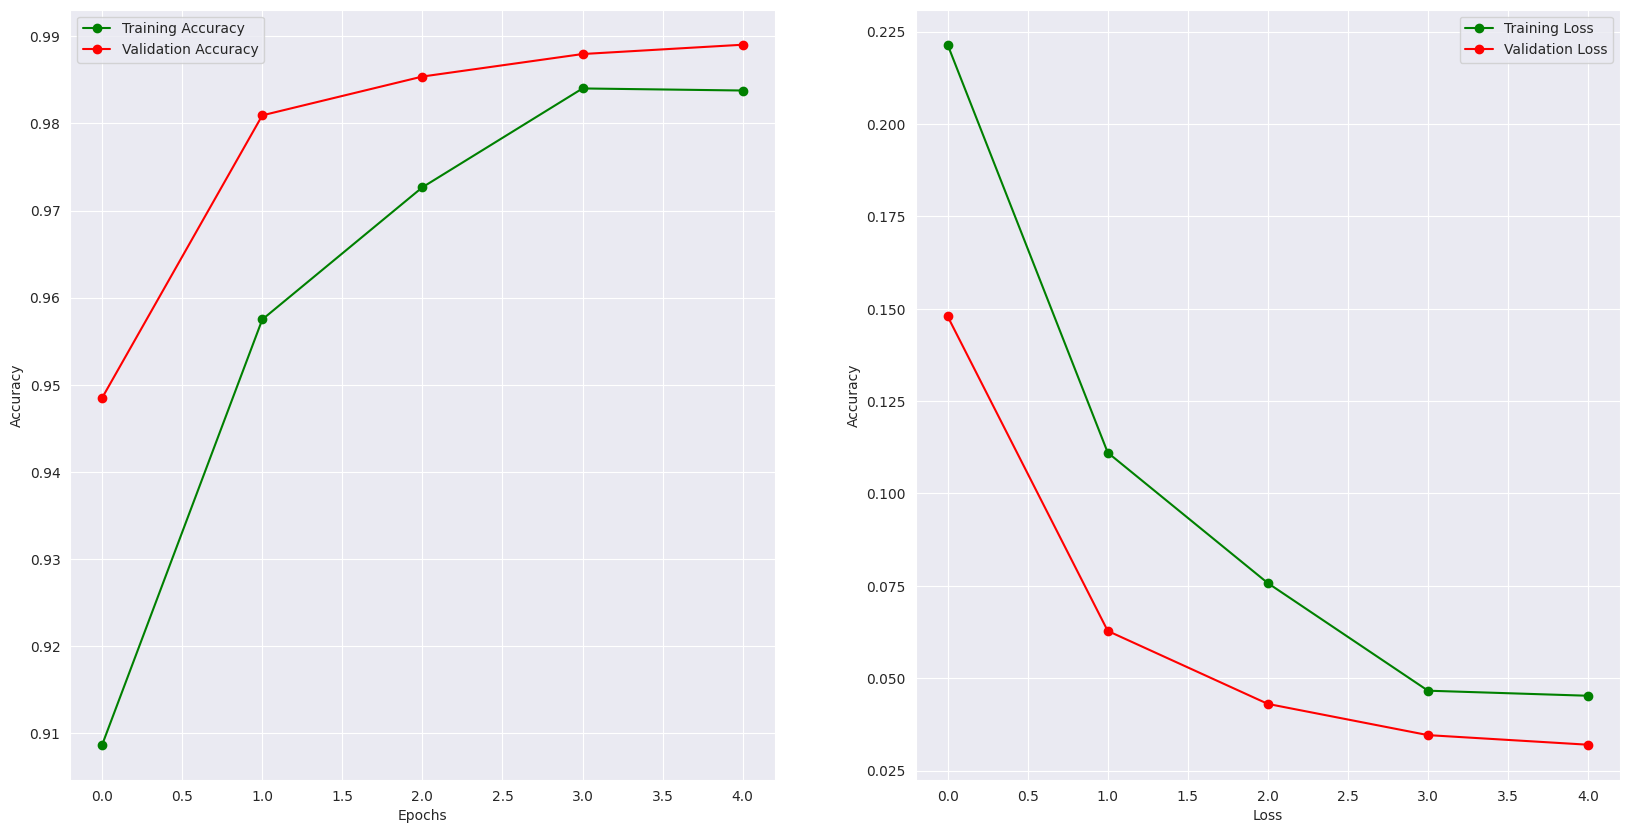

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs,train_acc,'go-',label='Training Accuracy')
ax[0].plot(epochs,val_acc,'ro-',label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].plot(epochs,train_loss,'go-',label='Training Loss')
ax[1].plot(epochs,val_loss,'ro-',label='Validation Loss')
ax[1].set_xlabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()